In [1]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_predictions(mo

### <span style='color:green'> [done] </span> Loading data frames:

In [2]:
loc = '../data/'
file = 'fight_stat_data_trained.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:len(df.columns)-4]]
df.date = pd.to_datetime(df.date)
print('Data Frame loaded: '+str(df.shape))
df.tail(3)

Data Frame loaded: (6731, 21)


,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,validation,2017-07-29,Aleksandra Albu,Kailin Curran,win,0.007043,-0.13660,1.572182,0.000126,0.146611,-0.234918,0.536244,-0.191655,0.609627,0.331825,0.489153,-1.247508,-0.017271,2.039564,0.562079,-2.148820
6729,test,2017-07-29,Eric Shelton,Jarred Brooks,lose,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053
6730,train,2017-07-29,Drew Dober,Joshua Burkman,win,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820


In [3]:
loc = '../data/'
file = 'ufc_fighters_stats_processed.csv'
stats = pd.read_csv(loc+file)
stats = stats[stats.columns[1:]]
print('Data Frame loaded: '+str(stats.shape))
stats.tail(3)

Data Frame loaded: (11198, 17)


,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
11195,Carlos Zevallos,3,0.0,-0,182.88,92.25,187.37,Orthodox,37.31,4.36,0.65,2.28,0.68,0.0,0.0,1.00,0.0
11196,Zach Zane,10,7.0,0,170.18,65.25,175.26,Southpaw,33.00,0.87,0.56,6.67,0.20,0.0,0.0,0.26,0.0
11197,Roger Zapata,4,0.0,-0,180.34,76.50,184.77,Southpaw,36.00,2.60,0.51,2.13,0.36,0.0,0.0,0.81,1.4


### <span style='color:green'> [done] </span> set new fight:

In [4]:
fighter = 'Jamahal Hill'
opponent = 'Glover Teixeira'
df = pd.concat([df,set_new_fight(fighter=fighter, opponent=opponent, data=df)], ignore_index=True)
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6729,test,2017-07-29,Eric Shelton,Jarred Brooks,lose,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053
6730,train,2017-07-29,Drew Dober,Joshua Burkman,win,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820
6731,None,2023-01-31,Jamahal Hill,Glover Teixeira,None,NaN,NaN,NaN,NaN,-2.200000,-0.370000,0.050000,-1.000000,2.660000,0.020000,-0.420000,-0.070000,-0.004158,-11.000000,3.000000,-1.000000


### <span style='color:green'> [done] </span> train KNN fight stats model:

In [5]:
req_data = ['fighter','opponent','result']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = ['td avg._dif',
     'td acc._dif',
     'td def._dif',
     'sub. avg._dif',
     'slpm_dif',
     'str. acc._dif',
     'sapm_dif',
     'str. def_dif',
     'stance_win_ratio',
     'win_perc_dif',
     'win_strk_dif',
     'lose_strk_dif']
df = df[req_data + y + X]
df.tail(3)

,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6729,Eric Shelton,Jarred Brooks,lose,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053
6730,Drew Dober,Joshua Burkman,win,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820
6731,Jamahal Hill,Glover Teixeira,None,NaN,NaN,NaN,NaN,-2.200000,-0.370000,0.050000,-1.000000,2.660000,0.020000,-0.420000,-0.070000,-0.004158,-11.000000,3.000000,-1.000000


In [6]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6732, 20), train_set=(3306, 12), validation_set=(1376, 12), test_set=(2049, 12)


,set,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6729,train,Eric Shelton,Jarred Brooks,lose,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053
6730,test,Drew Dober,Joshua Burkman,win,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820
6731,new,Jamahal Hill,Glover Teixeira,None,NaN,NaN,NaN,NaN,-2.200000,-0.370000,0.050000,-1.000000,2.660000,0.020000,-0.420000,-0.070000,-0.004158,-11.000000,3.000000,-1.000000


#### get tuned KNN parameters:

In [7]:
param = pd.read_csv('../global_variables/ml_models_parameters.csv').drop(columns=['Unnamed: 0'])
param = param[param.ml_model=='knn_reg'].reset_index(drop=True)
neighbors = int(param.value[0])
print('KNN optimized neighbors number = %d' %neighbors)

knn_model = set_knn_predictor(X_columns=X, y_columns=y, data=df, n=neighbors)
knn_model

KNN optimized neighbors number = 29


KNeighborsRegressor(n_neighbors=29)

#### predict fight statistics:

In [8]:
df = set_knn_predictions(model=knn_model, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6729,train,Eric Shelton,Jarred Brooks,lose,0.333990,0.333990,0.333990,0.333990,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053
6730,test,Drew Dober,Joshua Burkman,win,0.520816,0.520816,0.520816,0.520816,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820
6731,new,Jamahal Hill,Glover Teixeira,None,0.193870,0.193870,0.193870,0.193870,-2.200000,-0.370000,0.050000,-1.000000,2.660000,0.020000,-0.420000,-0.070000,-0.004158,-11.000000,3.000000,-1.000000


### <span style='color:green'> [done] </span> train KNN fight results model:

In [9]:
X = df.columns[4:len(df.columns)]
y = 'result'
print('X : %s' %X)
print('y : %s' %y)

X : Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif',
       'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif',
       'str. def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif',
       'lose_strk_dif'],
      dtype='object')
y : result


In [10]:
param = pd.read_csv('../global_variables/ml_models_parameters.csv').drop(columns=['Unnamed: 0'])
param

,ml_model,parameter_name,value,accuracy
0,knn_reg,neighbors,29,0.599900
1,knn_clf,neighbors,256,0.855245


In [11]:
n = np.min(param.value[param.ml_model=='knn_clf'])   
knn_clf_model = set_knn_clf(X_columns=X, y_columns=y, data=df, neighbors=n)
knn_clf_model

KNeighborsClassifier(n_neighbors=256)

In [12]:
df.tail(1)

,set,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6731,new,Jamahal Hill,Glover Teixeira,None,0.19387,0.19387,0.19387,0.19387,-2.2,-0.37,0.05,-1.0,2.66,0.02,-0.42,-0.07,-0.004158,-11.0,3.0,-1.0


In [13]:
df = set_pred_results(model=knn_clf_model, data=df, X_columns=X, y_columns=y)
df.tail(1)

,set,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result_pred
6731,new,Jamahal Hill,Glover Teixeira,None,0.19387,0.19387,0.19387,0.19387,-2.2,-0.37,0.05,-1.0,2.66,0.02,-0.42,-0.07,-0.004158,-11.0,3.0,-1.0,lose


In [14]:
X = df.columns[4:len(df.columns)]
y = 'result'
print('X : %s' %X)
print('y : %s' %y)

X : Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif',
       'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif',
       'str. def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif',
       'lose_strk_dif', 'result_pred'],
      dtype='object')
y : result


#### get tuned knn_clf parameters:

In [15]:
param = pd.read_csv('../global_variables/ml_models_parameters.csv').drop(columns=['Unnamed: 0'])
param

,ml_model,parameter_name,value,accuracy
0,knn_reg,neighbors,29,0.599900
1,knn_clf,neighbors,256,0.855245


In [16]:
param = pd.read_csv('../global_variables/ml_models_parameters.csv').drop(columns=['Unnamed: 0'])
param = param[param.ml_model=='SVM'].reset_index(drop=True)
kernel = param.value[param.parameter_name=='kernel'][0]

# default values: 
C, degree, gamma = 1, 'scale', 2

if kernel=='linear':
    C = np.min(param.value[param.parameter_name=='C'])
    parameter = 'C'
    value = C
elif kernel=='poly':
    degree = int(np.min(param.value[param.parameter_name=='degree']))
    parameter = 'degree'
    value = degree
elif kernel=='rbf':    
    gamma = float(np.min(param.value[param.parameter_name=='gamma']))
    parameter = 'gamma'
    value = gamma

print('SVM %s kernel: %s = %s' %(kernel,parameter,value))    
svm_model = set_svm_predictor(X_columns=X, y_columns=y, data=df, C=C, gamma=gamma, kernel=kernel, degree=degree)
svm_model

KeyError: 0

In [ ]:
svm_model = set_knn_predictor(X_columns=X, y_columns=y, data=df, n=neighbors)
svm_model

In [ ]:
>>>>>>>>>>>>>>>>>>

### <span style='color:green'> [done] </span> Load fighters ufc_fighters_stats_processed.csv:
used for visual view of fighters statistics along with prediction

In [17]:
get_fighters_stats(fighter=fighter, opponent=opponent, data=stats)

,Jamahal Hill,Glover Teixeira
wins,11,33
losses,1.0,8.0
draws,0,0
height,193.04,187.96
weight,92.25,92.25
reach,200.66,193.04
stance,Southpaw,Orthodox
age,31.0,43.0
slpm,6.46,3.8
str. acc.,0.52,0.5


#### <span style='color:green'> **[done]** </span> Final Prediction:

In [18]:
print('--------------------------------------')
print('%s vs %s:' %(fighter, opponent))
print('--------------------------------------')
print(get_fighters_stats(fighter=fighter,opponent=opponent, data=stats))
print('--------------------------------------')
print('Winner: ' + get_winner(fighter=fighter, opponent=opponent, data=df))
print('Pridiction Accuracy: ' + str(get_accuracy(act=df['result'][df.set=='test'], pred=df['result_pred'][df.set=='test'])))
print('--------------------------------------')

--------------------------------------
Jamahal Hill vs Glover Teixeira:
--------------------------------------
          Jamahal Hill Glover Teixeira
wins                11              33
losses             1.0             8.0
draws                0               0
height          193.04          187.96
weight           92.25           92.25
reach           200.66          193.04
stance        Southpaw        Orthodox
age               31.0            43.0
slpm              6.46             3.8
str. acc.         0.52             0.5
sapm              3.51            3.93
str. def          0.45            0.52
td avg.            0.0             2.2
td acc.            0.0            0.37
td def.           0.65             0.6
sub. avg.          0.0             1.0
--------------------------------------
Winner: Glover Teixeira
Pridiction Accuracy: 0.6637384089799903
--------------------------------------


Accuracy = 0.663738


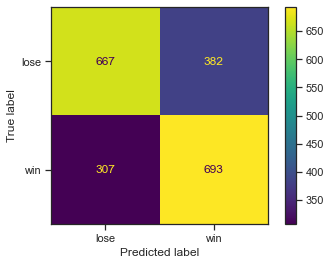

In [19]:
get_model_evaluation(data=df)